In [33]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [8]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    return (A,Z)

In [9]:
def relu(Z):
    A = np.maximum(0,Z)
    return (A,Z)

In [27]:
def initialize_parameters(layer_dims):
    np.random.seed(3)
    num_layers= len(layer_dims)
    parameters = {}
    
    for l in range(1,num_layers):
        parameters["W"+str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters["b"+str(l)] = np.zeros((layer_dims[l],1))
    
    return parameters

In [11]:
def linear_forward(A_prev,W,b):
    Z = np.dot(W,A_prev)+b
    linear_cache = (A_prev,W,b)
    
    return(Z,linear_cache)

In [12]:
def linear_activation_forward(A_prev,W,b,activation):
    
    if activation=="sigmoid":
        Z,linear_cache = linear_forward(A_prev,W,b)
        A,activation_cache = sigmoid(Z)
    elif activation=="relu":
        Z,linear_cache = linear_forward(A_prev,W,b)
        A,activation_cache = relu(Z)
        
    cache = (linear_cache,activation_cache)
    
    return A,cache

In [13]:
def L_model_forward(X,parameters):
    #print(type(parameters))
    #print(len(parameters))
    #print(parameters)
    A = X
    caches = []
    L = len(parameters)//2
    
    for l in range(1,L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev,parameters["W"+str(l)],parameters["b"+str(l)],activation="relu")
        caches.append(cache)
    AL,cache = linear_activation_forward(A,parameters["W"+str(L)],parameters["b"+str(L)],activation="sigmoid")
    caches.append(cache)
    
    return AL,caches

In [14]:
def compute_cost(AL,Y):
    m = Y.shape[1]
    cost = np.sum(Y*np.log(AL)-(1-Y)*(1-np.log(AL)))/(-m)
    return cost

In [15]:
def linear_backward(dZ,linear_cache):
    A_prev,W,b = linear_cache
    m = A_prev.shape[1]
    
    dW = np.dot(dZ,A_prev.T)/m
    db = np.sum(dZ)/m
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev,dW,db

In [16]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    Z = activation_cache
    
    if activation =="sigmoid":
        s = 1/(1+np.exp(-Z))
        dZ = dA * s * (1-s)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    elif activation =="relu":
        dZ = np.array(dA, copy=True)
        dZ[Z<=0] = 0
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    
    return dA_prev, dW, db

In [17]:
def L_model_backward(AL,Y,caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = -(np.divide(Y,AL)-np.divide((1-Y),(1-AL)))
    
    current_cache = caches[L-1]
    grads["dA"+str(L-1)],grads["dW"+str(L)],grads["db"+str(L)] = linear_activation_backward(dAL,current_cache,activation="sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        grads["dA"+str(l)],grads["dW"+str(l+1)],grads["db"+str(l+1)] = linear_activation_backward(grads["dA"+str(l+1)],current_cache,activation="relu")
        
    return grads

In [18]:
def update_parameters(parameters,grads,learning_rate):
    L = len(parameters)//2
    
    for l in range(L):
        parameters["W"+str(l+1)] = parameters["W"+str(l+1)] - learning_rate* grads["dW"+str(l+1)]
        parameters["b"+str(l+1)] = parameters["b"+str(l+1)] - learning_rate* grads["db"+str(l+1)]
    return parameters

In [40]:
def dnn_model(X,Y,layer_dims,iterations,learning_rate):
    
    #parameter initialization
    parameters = initialize_parameters(layer_dims)
    #print(type(parameters))
    #print(len(parameters))
    #print(parameters)
    costs = []
    
    #Model Training
    for i in range(0,iterations):
        AL,caches = L_model_forward(X,parameters)
        cost = compute_cost(AL,Y)
        grads = L_model_backward(AL,Y,caches)
        parameters = update_parameters(parameters,grads,learning_rate)
        if i%100 == 0:
            print('Cost after iteration %i: %f',(i,cost))
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.xlabel('Number of iterations(hundred)')
    plt.ylabel('Cost')
    plt.title('Learning rate: '+str(learning_rate))
    plt.show()
    
    return parameters

In [44]:
def predict(X,parameters):
    AL,caches = L_model_forward(X,parameters)
    predictions = int((AL>0.5))
    
    return predictions

In [51]:
data = pd.read_csv("Datasets/Titanic/train.csv")
#data.head()
X = np.array(data.drop(['Survived','Name','Sex','Ticket','Cabin','Embarked','Fare','Age'], axis=1)).T
Y = np.array(data["Survived"]).reshape((1,data.shape[0]))
data.info()
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
(4, 891)


(2, 150)
(1, 150)
Cost after iteration %i: %f (0, 0.6931552124623925)
Cost after iteration %i: %f (100, 0.10654204820425472)
Cost after iteration %i: %f (200, 0.053455773050567125)
Cost after iteration %i: %f (300, 0.03532874717259062)
Cost after iteration %i: %f (400, 0.02630109319618332)
Cost after iteration %i: %f (500, 0.020919893522263304)
Cost after iteration %i: %f (600, 0.017354391167408587)
Cost after iteration %i: %f (700, 0.014821120263510654)
Cost after iteration %i: %f (800, 0.01292979350936207)
Cost after iteration %i: %f (900, 0.011464492135940153)


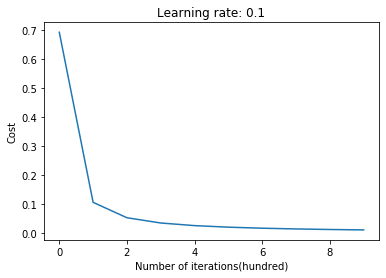

6
{'W1': array([[ 0.01779399,  0.00432836],
       [ 0.00096497, -0.01863493],
       [-0.00277388, -0.00354759]]), 'b1': array([[-1.3354852e-05],
       [-1.3354852e-05],
       [-1.3354852e-05]]), 'W2': array([[-0.00082741, -0.00627001, -0.00043818],
       [-0.00477218, -0.01313865,  0.00884622],
       [ 0.00860674,  0.01709573,  0.00050034]]), 'b2': array([[-0.00152425],
       [-0.00152425],
       [-0.00152425]]), 'W3': array([[-0.00404677, -0.0054536 , -0.01538529]]), 'b3': array([[4.57082799]])}


In [62]:
# Iris Dataset
iris = datasets.load_iris()
X = iris.data[:,:2].T
Y = iris.target.reshape((1,X.shape[1]))
print(X.shape)
print(Y.shape)

# Titanic Dataset
#data = pd.read_csv("Datasets/Titanic/train.csv")
#data.head()
#X = np.array(data.drop(['Survived','Name','Sex','Ticket','Cabin','Embarked','Fare','Age'], axis=1)).T
#Y = np.array(data["Survived"]).reshape((1,data.shape[0]))

learning_rate = 0.1
iterations = 1000
layer_dims = [2,3,3,1]
np.random.seed(4)

parameters = dnn_model(X,Y,layer_dims,iterations,learning_rate)
#print(len(parameters))
print(parameters)

In [47]:
predictions = predict([[7.0],[3.2]],parameters)
print(predictions)

1
